In [1]:
import calour as ca

In [2]:
%matplotlib inline

In [3]:
db=ca.database._get_database_class('dbbact')

creating logger


# The clostridium XIVa sequence used for the query

In [4]:
# the clostridium XIVa sequence
seq='TACGTAGGGGGCAAGCGTTATCCGGATTTACTGGGTGTAAAGGGAGCGTAGACGGCGAAGCAAGTCTGAAGTGAAAACCCAGGGCTCAACCCTGGGACTGCTTTGGAAACTGTTTTGCTAGAGTGTCGGAGAGGTAAGTGGAATTCCTAG'

# The dbBact release to use

In [5]:
# max_id = 3925 # release 10-20
max_id = 6237 # release 05-21

# Draw the wordcloud
## Parameter details:
* term_type='fscore': we want the combined recall+precision f-score for the sizes
* max_id=max_id: limit our results to annotations up to id max_id (so will recreate paper results even if more annotations are added to dbbact)
* threshold=0.1: keep only terms enriched with p-val <= 0.1 (under the null of term distribution over all annotations)
* relative_scaling=0: size determined only by order of f-score and not the f-score itself (to make more clear for small figure)

total db annotations: 3925
total annotations: 153


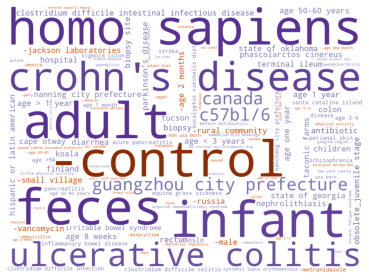

In [7]:
f=db.draw_wordcloud(features=[seq],width=1600,height=1200,term_type='fscore',max_id=max_id, threshold=0.1, relative_scaling=0)

In [8]:
f.savefig('./fig2-query-single-clos-fscore.pdf',dpi=600)

total db annotations: 3925
total annotations: 153


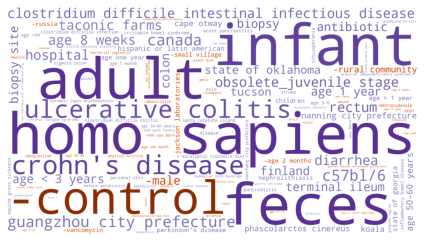

In [9]:
f=db.draw_wordcloud(features=[seq],width=1800,height=1000,term_type='fscore',max_id=max_id, threshold=0.1, relative_scaling=0)

In [10]:
f.savefig('./fig2-query-single-clos-fscore-18-10.pdf',dpi=600)

# Get a list of all annotations and f-scores for sup. table

## All sequence annotations

In [11]:
res=db.get_seq_annotation_strings(seq,max_id=max_id,get_summary=False)

In [12]:
with open('./sup-table-clostridium-annotations.tsv','w') as fl:
    fl.write('annotationid\texpid\tannotation\n')
    for anno,desc in res:
        fl.write('%d\t%d\t%s\n' % (anno['annotationid'], anno['expid'], desc))

## All term scores

In [13]:
annotations, term_info, taxonomy = db.db.get_seq_annotations(seq, max_id=max_id)
most_terms, prec_terms = db.db.get_common_annotation_term(annotations, term_info, num_common=0)
annotations_dict = {}
for cannotation in annotations:
    cid = cannotation['id']
    annotations_dict[str(cid)] = cannotation
fscore, recall, precision, term_count, reduced_f = db.get_enrichment_score(annotations_dict, [(1, list(annotations_dict.keys()))], term_info=term_info)

In [14]:
with open('./sup-table-clostridium-terms.tsv','w') as fl:
    fl.write('term\tfscore\trecall\tprecision\n')
    for cterm in fscore.keys():
        ccterm=cterm
        if ccterm[0]=='-':
            ccterm='LOWER IN %s' % cterm[1:]
        fl.write('%s\t%f\t%f\t%f\n' % (ccterm, fscore[cterm], recall[cterm], precision[cterm]))

# Other options for plotting - which is nicer?

In [ ]:
f=db.draw_wordcloud(features=[seq],width=2000,height=2000,term_type='fscore',max_id=500, threshold=0.1)

In [ ]:
f.savefig('./fig2-query-single-clos-fscore-default.pdf',dpi=600)

In [ ]:
f=db.draw_wordcloud(features=[seq],width=2000,height=2000,term_type='fscore',threshold=0.05)

In [ ]:
f.savefig('./fig2-query-single-clos-fscore-new.pdf',dpi=600)

In [ ]:
f=db.draw_wordcloud(features=[seq],width=2000,height=2000,term_type='fscore',threshold=0.05, relative_scaling=0)

In [ ]:
f.savefig('./fig2-query-single-clos-fscore-new-rel0.pdf',dpi=600)

In [ ]:
f=db.draw_wordcloud(features=[seq],width=2000,height=2000,term_type='fscore')

In [ ]:
f.savefig('test3.pdf',dpi=600)

In [ ]:
f=db.draw_wordcloud(features=[seq],width=2000,height=2000,term_type='recall')

In [ ]:
f.savefig('./fig2-query-single-clos-recall.pdf',dpi=600)

In [ ]:
f=db.draw_wordcloud(features=[seq],width=500,height=500,term_type='fscore', relative_scaling=1)

In [ ]:
# relative_scaling 0 means use only the rank for sizes
f=db.draw_wordcloud(features=[seq],width=2000,height=2000,term_type='fscore', relative_scaling=0)

In [ ]:
f.savefig('./fig2-query-single-clos-fscore-scale0.pdf',dpi=600)

In [ ]:
f=db.draw_wordcloud(features=[seq],width=2000,height=2000,term_type='recall', relative_scaling=0)

In [ ]:
ss='TACGTAGGGGGCAAGCGTTATCCGGATTTACTGGGTGTAAAGGGAGCGTAGACGGCTTTGCAAGTCTGACGTGAAACTCCGGGGCTCAACTCCGGAACTGCGTTGGAAACTGTAAGGCTTGAGTGCCGGAGAGGTAAGCGGAATTCCTAG'
f=db.draw_wordcloud(features=[ss],width=500,height=500,term_type='fscore')

In [ ]:
ss='TACGTAGGGGGCAAGCGTTATCCGGATTTACTGGGTGTAAAGGGAGCGTAGACGGCTTTGCAAGTCTGACGTGAAACTCCGGGGCTCAACTCCGGAACTGCGTTGGAAACTGTAAGGCTTGAGTGCCGGAGAGGTAAGCGGAATTCCTAG'
f=db.draw_wordcloud(features=[seq],width=500,height=500,term_type='fscore')

In [ ]:
ss='TACGTAGGTGGCAAGCGTTGTCCGGATTTATTGGGCGTAAAGCGAGCGCAGGCGGAAAAATAAGTCTAATGTGAAAGCCCTCGGCTTAACCGAGGAACTGCATCGGAAACTGTTTTTCTTGAGTGCAGAAGAGGAGAGTGGAACTCCATG'
f=db.draw_wordcloud(features=[ss],width=500,height=500,term_type='fscore')

In [ ]:
ss='TACGTAGGTGGCAAGCGTTGTCCGGATTTATTGGGCGTAAAGCGAGCGCAGGCGGAAAAATAAGTCTAATGTGAAAGCCCTCGGCTTAACCGAGGAACTGCATCGGAAACTGTTTTTCTTGAGTGCAGAAGAGGAGAGTGGAACTCCATG'
f=db.draw_wordcloud(features=[ss],width=500,height=500,term_type='fscore',threshold=0.05)

In [ ]:
ss='TACGTAGGTGGCAAGCGTTGTCCGGATTTATTGGGCGTAAAGCGAGCGCAGGCGGAAAAATAAGTCTAATGTGAAAGCCCTCGGCTTAACCGAGGAACTGCATCGGAAACTGTTTTTCTTGAGTGCAGAAGAGGAGAGTGGAACTCCATG'
f=db.draw_wordcloud(features=[ss],width=500,height=500,term_type='fscore',threshold=0.01,relative_scaling=0.5)

# lets test a few plot types

In [ ]:
f=db.draw_wordcloud(features=[seq],width=800,height=800,term_type='fscore',max_id=500)
f.savefig('test1.pdf',dpi=600)

In [ ]:
f=db.draw_wordcloud(features=[seq],width=800,height=800,term_type='fscore',max_id=500,threshold=0.1)
f.savefig('test2.pdf',dpi=600)

In [ ]:
f=db.draw_wordcloud(features=[seq],width=800,height=800,term_type='fscore',max_id=500,threshold=0.1,relative_scaling=1)
f.savefig('test3.pdf',dpi=600)

In [ ]:
f=db.draw_wordcloud(features=[seq],width=800,height=800,term_type='fscore',max_id=500,threshold=0.1,relative_scaling=0)
f.savefig('test4.pdf',dpi=600)

In [ ]:
ss='TACGTAGGTGGCAAGCGTTGTCCGGATTTATTGGGCGTAAAGCGAGCGCAGGCGGAAAAATAAGTCTAATGTGAAAGCCCTCGGCTTAACCGAGGAACTGCATCGGAAACTGTTTTTCTTGAGTGCAGAAGAGGAGAGTGGAACTCCATG'
f=db.draw_wordcloud(features=[ss],width=800,height=800,term_type='fscore',max_id=500,threshold=0.1,relative_scaling=0)
f.savefig('test5.pdf',dpi=600)

In [ ]:
ss='TACGTAGGTGGCAAGCGTTGTCCGGATTTATTGGGCGTAAAGCGAGCGCAGGCGGAAAAATAAGTCTAATGTGAAAGCCCTCGGCTTAACCGAGGAACTGCATCGGAAACTGTTTTTCTTGAGTGCAGAAGAGGAGAGTGGAACTCCATG'
f=db.draw_wordcloud(features=[ss],width=800,height=800,term_type='fscore',max_id=500,threshold=0.1,relative_scaling=0.5)
f.savefig('test6.pdf',dpi=600)

In [ ]:
ss='TACGTAGGGGGCAAGCGTTATCCGGATTTACTGGGTGTAAAGGGAGCGTAGACGGCTTTGCAAGTCTGACGTGAAACTCCGGGGCTCAACTCCGGAACTGCGTTGGAAACTGTAAGGCTTGAGTGCCGGAGAGGTAAGCGGAATTCCTAG'

In [ ]:
f=db.draw_wordcloud(features=[ss],width=800,height=800,term_type='fscore',max_id=500,threshold=0.1,relative_scaling=0.5)
f.savefig('test7.pdf',dpi=600)

In [ ]:
f=db.draw_wordcloud(features=[ss],width=800,height=800,term_type='fscore',max_id=500,threshold=0.1,relative_scaling=0)
f.savefig('test8.pdf',dpi=600)